# Finding the Best Markets to Advertise In

In this project, we assume we are working for an e-learning company that offers courses on programming. We cover courses on web and mobile development, data science, and game development. We want to promote our company.  
Our goal in this project is to find out the two best markets to advertise our product in.

### Reading in Data

In [2]:
import pandas as pd
fcc_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)
fcc_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fcc_survey.columns.tolist()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

The data relevant for the analysis are:  
 - Location: CountryLive  
 - How much they will spend on learning: MoneyForLeaning
 - Job role interests: JobPref, JobWherePref, or JobRoleInterest

For this anaylysis we are using a ready-made data set instead of organizng a survey. This is a cheaper option as organizing surveys are very costly. Free code camp has already built a survey data set about new coders. The dataset can be found _[here](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/README.md)_.

### Is Sample Representative?

In [4]:
fcc_survey['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                                                                 6.435927
  Data Scientist                                                                                                                                                                          2.173913
Back-End Web Developer                                                                                                                                                                    2.030892
  Mobile Developer                                                                                                                                                                        1.673341
Game Developer           

From the value counts above, we can see that there are a lot of people interested in web development- full-stack web developer, front-end web developer, and back-end web developer.   
Many people have also listed more than one subject as areas of interest. To get a better idea of how many people have varied interests we will generate a frequency table describing the number of options

In [5]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = fcc_survey['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Only 31.7% of the participants have a clear idea about what their main interest is in, while the majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.  
The focus of our courses is on web and mobile development, so we will determine how many respondents chose at least one of those two options.

In [6]:
web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


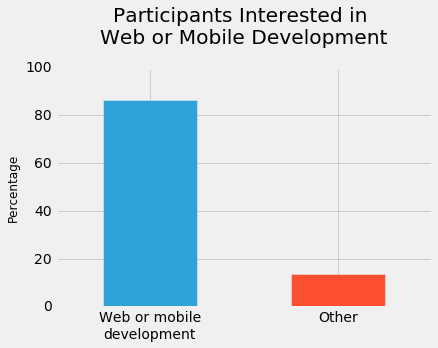

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Participants Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other'], rotation = 0)
plt.ylim([0,100])
plt.show()

About 86% of the people in this survey are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming, but mostly web and mobile development. 

Now we need to figure out what are the best markets to invest money in for advertising our courses.

### New Coders- Locations and Densities

In [8]:
fcc_interest_not_null = fcc_survey[fcc_survey['JobRoleInterest'].notnull()].copy()

absolute_frequencies = fcc_interest_not_null['CountryLive'].value_counts()
relative_frequencies = fcc_interest_not_null['CountryLive'].value_counts(normalize = True) * 100

pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


Almost half of our potential customers are located in the US, so we likely want to focus on advertising in this market. India has the second customer density, but it is not too far from the United Kingdom or Canada.

To make a better decision on the best markets to advertise in, we need to determine how much money people are willing to spend on learning in each country. Advertising in a market where customers only want to learn for free will not be profitable.

### Money Spent on Learning

The 'MoneyForLearning' column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. The company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:
 - These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
 - Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [9]:
fcc_interest_not_null['MonthsProgramming'].replace(0,1, inplace = True)

fcc_interest_not_null['money_per_month'] = fcc_interest_not_null['MoneyForLearning'] / fcc_interest_not_null['MonthsProgramming']
fcc_interest_not_null['money_per_month'].isnull().sum()

675

In [10]:
fcc_interest_not_null = fcc_interest_not_null[fcc_interest_not_null['money_per_month'].notnull()]

In [11]:
fcc_interest_not_null = fcc_interest_not_null[fcc_interest_not_null['CountryLive'].notnull()]

In [12]:
fcc_interest_not_null['CountryLive'].value_counts()

United States of America         2933
India                             463
United Kingdom                    279
Canada                            240
Poland                            122
Germany                           114
Brazil                            111
Australia                         102
Ukraine                            79
Russia                             79
Nigeria                            72
Spain                              66
Romania                            65
France                             62
Netherlands (Holland, Europe)      59
Italy                              52
Serbia                             44
Philippines                        43
Ireland                            41
Greece                             40
South Africa                       36
Mexico                             33
Turkey                             31
New Zealand                        30
Hungary                            30
Norway                             30
Argentina   

In [13]:
fcc_country_means = fcc_interest_not_null.groupby('CountryLive').mean()
fcc_country_means['money_per_month'][['United States of America',
                            'India', 
                            'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

It is surprising that India spends more money on learning than the UK or Canada. We would expect countries with a higer GDP per capita spend more on learning than people in India. 

This could be caused by unrepresentative data, wrong survey answers- causing extreme outliers that could drastically increase the average for India or decrease the average for the UK and Canada, or it could be that these answers are correct.


### Dealing with Outliers

In [18]:
countries_of_interest = fcc_interest_not_null[fcc_interest_not_null['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


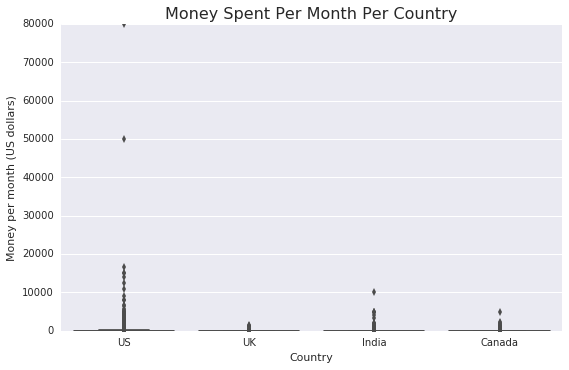

In [19]:
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = countries_of_interest)
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

We see the US has a few extreme outliers. It's not impossible to spend $50000 or more a month on learning, but seems unlikely. We will eliminate these outliers. 

In [20]:
countries_of_interest = countries_of_interest[countries_of_interest['money_per_month'] < 20000]

In [24]:
fcc_country_means = countries_of_interest.groupby('CountryLive').mean()

In [25]:
print(fcc_country_means['money_per_month'])

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: money_per_month, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


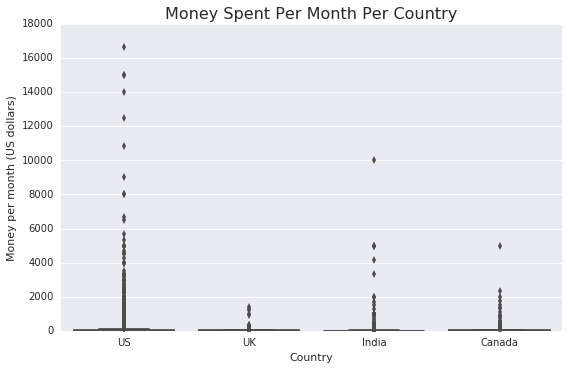

In [26]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = countries_of_interest)
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

There seem to be some extreme outliers for India, Canada, and the US still. We will examine this respondents further to determine if this is good data. 

In [29]:
india_outliers = countries_of_interest[
    (countries_of_interest['CountryLive'] == 'India') & 
    (countries_of_interest['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


Based on these survey answers, there isn't anything to justify the large amount of money spent; None of the respondents attended bootcamps. It is possible they included a college tution as part of the money spent on learning, but it is hard to be certain. It is likely safer to remove these values.

In [30]:
countries_of_interest = countries_of_interest.drop(india_outliers.index)

We also identified an extreme outlier for Canada, so we will exaime those respondents next.

In [37]:
canada_outliers = countries_of_interest[
    (countries_of_interest['CountryLive'] == 'Canada') & 
    (countries_of_interest['money_per_month'] > 4500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This respondent did attend a bootcamp- which is expensive. The data shows that respondent had been programming for no more than two months when he/she completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove this outlier.

In [38]:
countries_of_interest = countries_of_interest.drop(canada_outliers.index)

Lastly, we will examine the US outliers.

In [41]:
us_outliers = countries_of_interest[
    (countries_of_interest['CountryLive'] == 'United States of America') & 
    (countries_of_interest['money_per_month'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Six respondents attended bootcamps, which justifies the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend $6000 each month, but they have never attended a bootcamp.

The respondents that did attend bootcamp but have not been programming for very long are likely in a similar situation as the outlier from Canada. We will also remove these respondents. 


In [42]:
no_bootcamp = countries_of_interest[
    (countries_of_interest['CountryLive'] == 'United States of America') & 
    (countries_of_interest['money_per_month'] >= 6000) &
    (countries_of_interest['AttendedBootcamp'] == 0)
]

countries_of_interest = countries_of_interest.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = countries_of_interest[
    (countries_of_interest['CountryLive'] == 'United States of America') & 
    (countries_of_interest['money_per_month'] >= 6000) &
    (countries_of_interest['MonthsProgramming'] <= 3)
]
countries_of_interest = countries_of_interest.drop(less_than_3_months.index)

Now that we have eliminated the outliers, we will recompute the mean and revisualize the distribution graph.

In [43]:
fcc_country_means = countries_of_interest.groupby('CountryLive').mean()

In [44]:
print(fcc_country_means['money_per_month'])

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


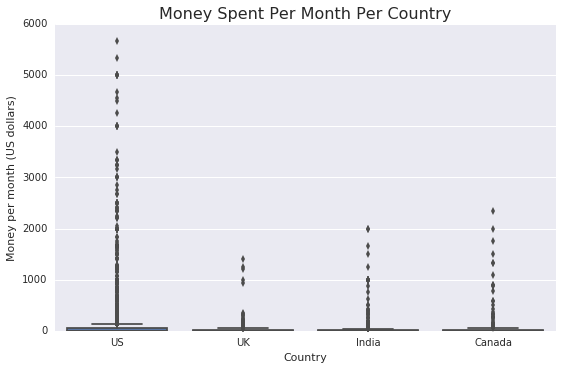

In [46]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = countries_of_interest)
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

### Choosing the Best Markets to Advertiste In

In [47]:
countries_of_interest['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

The US stands out as a good option to advertise in. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK- as they are not willing to spend as much money on learning a month, but let's take a second look at India before deciding to choose Canada as our second best choice:

\$59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month. India can also offer twice as many potential customers than Canada. So, the choice between India and Canada is not crystal clear. At this point, the results could be sent to the marketing team so they can use their expertise to make a decison.